# Detailed Evaluation

This notebook shows how to produce some tables and plots for analysing results. This is meant as a starting point, because eah game will require a custom evaluation depending on its metrics and experiments.

This notebook uses the output files of evaluation/bencheval.py. Run that first.

In [1]:
import sys
sys.path.append('..')

from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from matplotlib.patches import Polygon

import evaluation.evalutils as utils
from evaluation.makingtables import build_dispersion_table
import clemgame.metrics as clemmetrics


      _                _                     _     
     | |              | |                   | |    
  ___| | ___ _ __ ___ | |__   ___ _ __   ___| |__  
 / __| |/ _ \ '_ ` _ \| '_ \ / _ \ '_ \ / __| '_ \ 
| (__| |  __/ | | | | | |_) |  __/ | | | (__| | | |
 \___|_|\___|_| |_| |_|_.__/ \___|_| |_|\___|_| |_|



Choose path for the .csv with the raw scores. This is created after running ```bencheval.py```.

In [2]:
RAW_PATH = Path('../results/raw.csv')
raw_df = pd.read_csv(RAW_PATH, index_col=0)

Let's inspect the contents of ```data```:

In [3]:
# raw_df = raw_df[raw_df.experiment=='0_full_game_4p']
raw_df

,game,model,experiment,episode,metric,value
0,wizardsapprentice,programmatic-t0.0--programmatic-t0.0--programm...,0_full_game_4p,episode_8,Aborted,0.0
1,wizardsapprentice,programmatic-t0.0--programmatic-t0.0--programm...,0_full_game_4p,episode_8,Request Count,99.0
2,wizardsapprentice,programmatic-t0.0--programmatic-t0.0--programm...,0_full_game_4p,episode_8,Parsed Request Count,99.0
3,wizardsapprentice,programmatic-t0.0--programmatic-t0.0--programm...,0_full_game_4p,episode_8,Violated Request Count,0.0
4,wizardsapprentice,programmatic-t0.0--programmatic-t0.0--programm...,0_full_game_4p,episode_8,Request Success Ratio,1.0
...,...,...,...,...,...,...
535,wizardsapprentice,Llama-3-70B-Instruct-Anyscale-t0.0--programmat...,0_full_game_4p,episode_3,Played,0.0
536,wizardsapprentice,Llama-3-70B-Instruct-Anyscale-t0.0--programmat...,0_full_game_4p,episode_4,Played,1.0
537,wizardsapprentice,Llama-3-70B-Instruct-Anyscale-t0.0--programmat...,0_full_game_4p,episode_1,Played,1.0
538,wizardsapprentice,Llama-3-70B-Instruct-Anyscale-t0.0--programmat...,0_full_game_4p,episode_9,Played,1.0


If we want to evaluate a single game and the results directory contained more games, we can filter the game column:

In [19]:
# game_df = raw_df[raw_df.game == 'privateshared']
# game_df

## Overview tables

Get dispersion metrics over all episodes. Note that we use groupby, which will ignore NaN values, according to the documentation!

In [4]:
stats_df = build_dispersion_table(['game', 'model', 'metric'], raw_df) # could also use raw_df for results for all games
stats_df

mean   
game              model                                              metric                               
wizardsapprentice Llama-3-70B-Instruct-Anyscale-t0.0--custom-t0.0... Aborted                   0.100000  \
                                                                     Lose                      0.200000   
                                                                     Main Score               33.703704   
                                                                     Parsed Request Count     97.100000   
                                                                     Played                    0.900000   
                                                                     Request Count            99.400000   
                                                                     Request Success Ratio     0.976285   
                                                                     Success                   0.700000   
                                                                     Violated Request Count    2.300000   
                  Llama-3-70B-Instruct-Anyscale-t0.0--programmati... Aborted                   0.100000   
                                                                     Lose                      0.200000   
                                                                     Main Score               34.074074   
                                                                     Parsed Request Count     89.100000   
                                                                     Played                    0.900000   
                                                                     Request Count            93.700000   
                                                                     Request Success Ratio     0.861460   
                                                                     Success                   0.700000   
                                                                     Violated Request Count    4.600000   
                  Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0--... Aborted                   0.100000   
                                                                     Lose                      0.000000   
                                                                     Main Score               35.555556   
                                                                     Parsed Request Count     97.400000   
                                                                     Played                    0.900000   
                                                                     Request Count           101.700000   
                                                                     Request Success Ratio     0.957877   
                                                                     Success                   0.900000   
                                                                     Violated Request Count    4.300000   
                  Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic-... Aborted                   0.200000   
                                                                     Lose                      0.400000   
                                                                     Main Score               29.074074   
                                                                     Parsed Request Count     83.200000   
                                                                     Played                    0.800000   
                                                                     Request Count            90.000000   
                                                                     Request Success Ratio     0.831097   
                                                                     Success                   0.400000   
                                                                     Violated Request Count    6.800000   
                  custom-t0.0--cu

Break results down by experiment:

In [5]:
detailed_stats_df = build_dispersion_table(['game', 'model', 'experiment', 'metric'], raw_df) # could also use raw_df for results for all games
detailed_stats_df

mean   
game              model                                              experiment     metric                               
wizardsapprentice Llama-3-70B-Instruct-Anyscale-t0.0--custom-t0.0... 0_full_game_4p Aborted                   0.100000  \
                                                                                    Lose                      0.200000   
                                                                                    Main Score               33.703704   
                                                                                    Parsed Request Count     97.100000   
                                                                                    Played                    0.900000   
                                                                                    Request Count            99.400000   
                                                                                    Request Success Ratio     0.976285   
                                                                                    Success                   0.700000   
                                                                                    Violated Request Count    2.300000   
                  Llama-3-70B-Instruct-Anyscale-t0.0--programmati... 0_full_game_4p Aborted                   0.100000   
                                                                                    Lose                      0.200000   
                                                                                    Main Score               34.074074   
                                                                                    Parsed Request Count     89.100000   
                                                                                    Played                    0.900000   
                                                                                    Request Count            93.700000   
                                                                                    Request Success Ratio     0.861460   
                                                                                    Success                   0.700000   
                                                                                    Violated Request Count    4.600000   
                  Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0--... 0_full_game_4p Aborted                   0.100000   
                                                                                    Lose                      0.000000   
                                                                                    Main Score               35.555556   
                                                                                    Parsed Request Count     97.400000   
                                                                                    Played                    0.900000   
                                                                                    Request Count           101.700000   
                                                                                    Request Success Ratio     0.957877   
                                                                                    Success                   0.900000   
                                                                                    Violated Request Count    4.300000   
                  Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic-... 0_full_game_4p Aborted                   0.200000   
                                                                                    Lose                      0.400000   
                                                                                    Main Score               29.074074   
                                                                                    Parsed Request Count     83.200000   
                                                                                    Play

To save the table, call ```to_csv```, ```to_html``` and/or ```to_latex``` (there are also other formats and customization options, check the pandas docs):

In [6]:
stats_df.to_csv('../results/stats.csv')

## Basic Plots

Plots can of course be created with ```matplotlib``` directly, but ```seaborn``` makes it very easy to work with pandas dataframes. Let's create a barplot with an overview by model and experiment:

In [7]:
# choose a metric
METRIC = 'Main Score'
metric_df = raw_df[raw_df.metric == METRIC].sort_values('experiment')
metric_df

,game,model,experiment,episode,metric,value
7,wizardsapprentice,programmatic-t0.0--programmatic-t0.0--programm...,0_full_game_4p,episode_8,Main Score,22.222222
263,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_2,Main Score,22.222222
271,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_6,Main Score,48.148148
279,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_7,Main Score,33.333333
287,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_3,Main Score,0.000000
295,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_4,Main Score,37.037037
303,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_1,Main Score,29.629630
311,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_9,Main Score,33.333333
319,wizardsapprentice,Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic...,0_full_game_4p,episode_5,Main Score,55.555556
327,wizardsapprentice,Llama-3-70B-Instruct-Anyscale-t0.0--custom-t0....,0_full_game_4p,episode_8,Main Score,0.000000


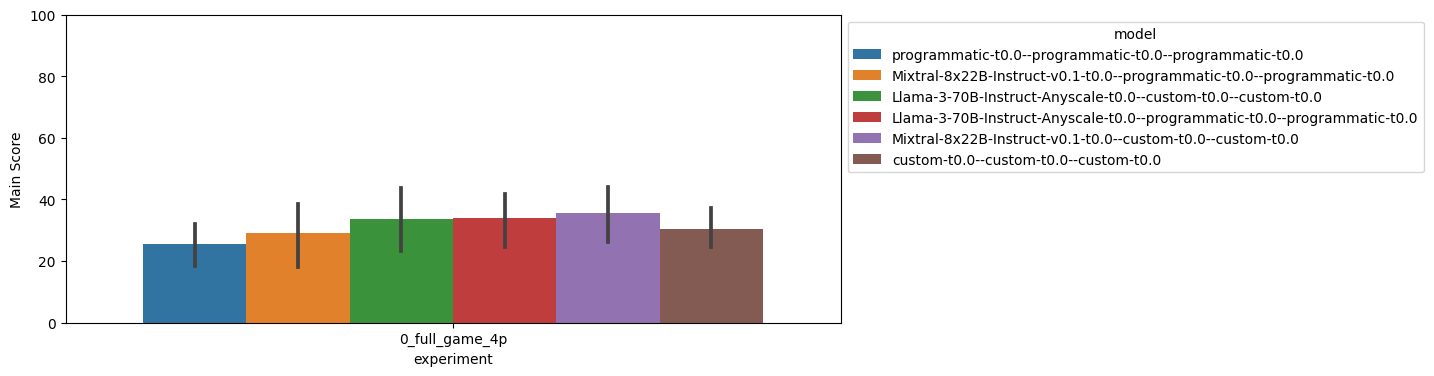

In [8]:
# change the figure size according to your needs
fig, ax = plt.subplots(figsize=(10, 4))

# choose what goes in each axis and legend according to your needs
# you can also e.g. swap y and hue, to get games in the legend and models in the axis
g = sns.barplot(metric_df,
                x='experiment',
                y='value',
                hue='model', 
                ax=ax)

# customize plot details according to your needs
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0, 100)
plt.ylabel(METRIC)

plt.show()

## Benchmark plots

Reproducing Figure 10 in the paper. As more models or games are added, sizes must be adjusted accordingly:

In [9]:
# read the clem scores
RESULTS_PATH = Path('../results/results.csv')
clem_df = pd.read_csv(RESULTS_PATH, index_col=0)
clem_df

,"-, clemscore","all, Average % Played","all, Average Quality Score","wizardsapprentice, % Played","wizardsapprentice, Quality Score","wizardsapprentice, Quality Score (std)"
Llama-3-70B-Instruct-Anyscale-t0.0--custom-t0.0--custom-t0.0,30.33,90.0,33.70,90.0,33.70,17.69
Llama-3-70B-Instruct-Anyscale-t0.0--programmatic-t0.0--programmatic-t0.0,30.66,90.0,34.07,90.0,34.07,14.72
Mixtral-8x22B-Instruct-v0.1-t0.0--custom-t0.0--custom-t0.0,32.00,90.0,35.56,90.0,35.56,14.96
Mixtral-8x22B-Instruct-v0.1-t0.0--programmatic-t0.0--programmatic-t0.0,23.26,80.0,29.07,80.0,29.07,17.98
custom-t0.0--custom-t0.0--custom-t0.0,30.37,100.0,30.37,100.0,30.37,10.59
programmatic-t0.0--programmatic-t0.0--programmatic-t0.0,23.00,90.0,25.56,90.0,25.56,11.71


Horizontal bar plot with player, aborted, lost:

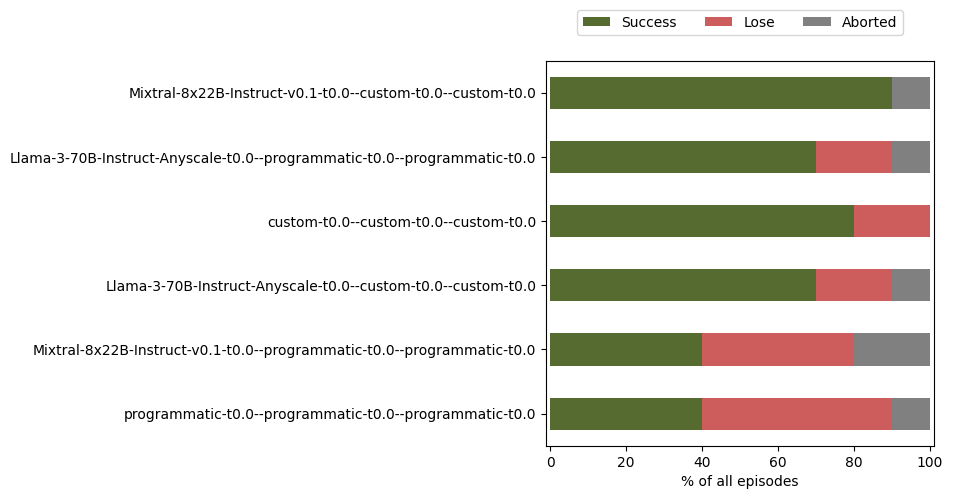

In [10]:
STACK_COLORS = ['darkolivegreen', 'indianred', 'gray']

df_aux = raw_df[raw_df.metric.isin(utils.GAMEPLAY_METRICS)]
df_aux = (df_aux.pivot(index=['game', 'model', 'experiment', 'episode'],
                       columns='metric',
                       values='value')
                .reset_index()
                .drop(columns=['game', 'experiment', 'episode'])
                .groupby('model')
                .sum()
                .sort_values(axis=1, by='metric', ascending=False))
percs = 100 * df_aux.div(df_aux.sum(axis=1), axis=0)
order = clem_df.sort_values(by='-, clemscore').index
percs = percs.reindex(order)

percs.plot(kind='barh',
           stacked=True,
           figsize=(5, 5),
           colormap=ListedColormap(STACK_COLORS))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3)
plt.xlabel('% of all episodes')
plt.xlim(-1, 101)
plt.ylabel('')
plt.show()

Bar plot with the sorted clemscores (they were not sorted in the paper):

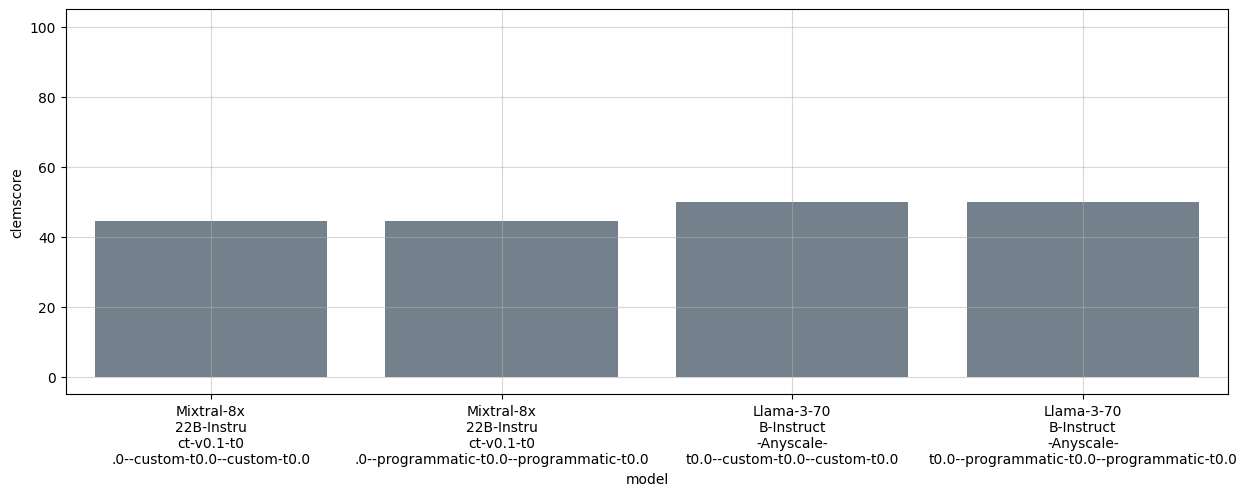

In [34]:
clem_aux = clem_df.sort_values(by='-, clemscore').reset_index(names='model')
# below is a hack to make the current names fit the plot
# ideally a dictionary with short names should be used as in the original implementation for the paper
# warning, if models have matching names up the limit, results will be wrongly merged!
clem_aux['model'] = clem_aux['model'].apply(lambda x: f'{x[:10]}\n{x[10:20]}\n{x[20:30]}\n{x[30:]}')

fig = plt.figure(figsize=(15, 5))
sns.barplot(clem_aux, x='model', y='-, clemscore', color='slategray')
plt.ylim(-5, 105)
plt.ylabel('clemscore')
plt.grid(alpha=0.5)
plt.show()

Polygons. This can get complicated if more games are added. In particular, COLUMN_ORDER must be adjusted. For more models, the number of subplots and figsize must be adjusted.

metric               game      experiment  Main Score  Played
0       wizardsapprentice  0_full_game_4p        50.0     1.0
{'x': None, 'y': None, 'hue': None, 'style': None}
       x     y                hue              style
0  100.0  50.0  wizardsapprentice  wizardsapprentice


KeyError: 'wizardsapprentice'

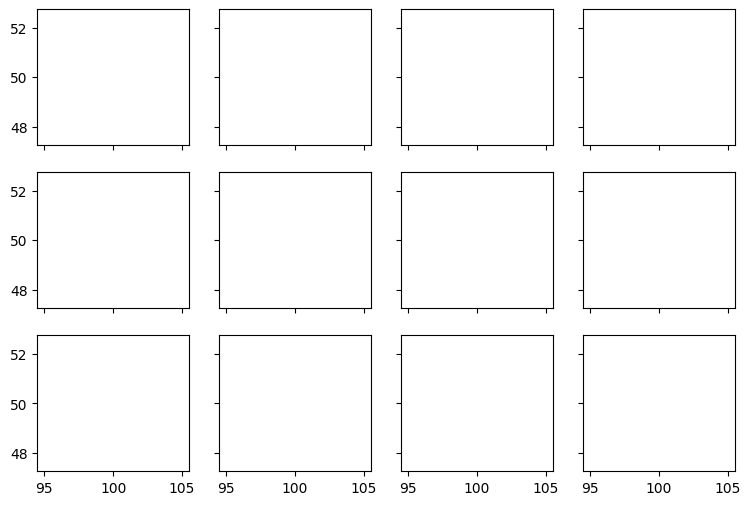

In [35]:
def ccw_sort(p):
    """Put the nodes in clockwise order."""
    # from https://stackoverflow.com/a/44143444 by user ImportanceOfBeingEarnest
    p = np.array(p)
    mean = np.mean(p, axis=0)
    d = p - mean
    s = np.arctan2(d[:, 0], d[:, 1])
    return p[np.argsort(s), :]


fig, ax_list = plt.subplots(3, 4, figsize=(9, 6), sharey=True, sharex=True)
axs = ax_list.flatten()

for n, (model, model_df) in enumerate(raw_df.groupby('model')):
    rows = model_df.metric.isin(utils.MAIN_METRICS)
    df_aux = model_df[rows]
    df_aux = (df_aux.pivot(index=['game', 'experiment', 'episode'],
                            columns='metric',
                            values='value')
                    .reset_index())
    df_aux = df_aux.drop(['episode'], axis=1)
    print(df_aux)

    # create the x and y coordinates for each game
    dots = []
    for game, game_df in df_aux.groupby('game'):
        overall_means = (game_df.mean(numeric_only=True)
                                .fillna(0))
        # replace missing score by 0 when all aborted
        played = overall_means[clemmetrics.METRIC_PLAYED] * 100
        score = overall_means[clemmetrics.BENCH_SCORE]
        dots.append((game, played, score))
    labels, played, scores = zip(*dots)

    # put them in a good order for the polygon
    edges = ccw_sort(list(zip(played, scores)))

    # create the polygon and draw it
    polygon = Polygon(edges, facecolor='lightgray')
    axs[n].add_patch(polygon)

    legend = True if n == 10 else False
    g = sns.scatterplot(x=played,
                        y=scores,
                        hue=labels,
                        style=labels,
                        hue_order=utils.COLUMN_ORDER[1:],
                        style_order=utils.COLUMN_ORDER[1:],
                        s=80,
                        ax=axs[n],
                        legend=legend)
    axs[n].set_xlim(-5, 105)
    axs[n].set_ylim(-5, 105)
    axs[n].set_ylabel('avr. quality')
    axs[n].set_xlabel('% played')
    axs[n].set_title(model, fontsize=8)

fig.legend(loc='lower right', bbox_to_anchor=(0.98, 0.08))
axs[10].legend().set_visible(False)
fig.delaxes(axs[11])
plt.tight_layout()
plt.show()